# Feature set 1

In [372]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import statsmodels.api as sm
from statistics import mean
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [373]:
%store -r master
%store -r feature_set_1
%store -r feature_set_2
%store -r feature_set_3

In [374]:
feature_set_1.columns

Index(['Player', 'Age', 'Total Mins', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TS%',
       'WS', 'BPM', 'MIP'],
      dtype='object')

# Graphs to prove our features are not distributed normally, therefore cannot use Gaussian Naive Bayes Model (or any Naive Bayes models)

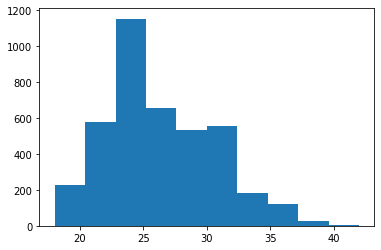

In [375]:
plt.hist(feature_set_1["Age"])
plt.show()

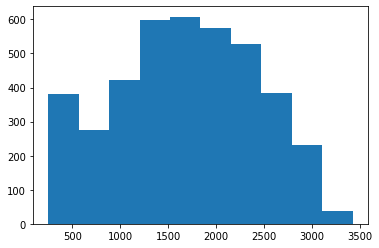

In [376]:
plt.hist(feature_set_1["Total Mins"])
plt.show()

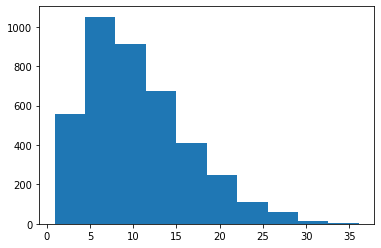

In [377]:
plt.hist(feature_set_1["PTS"])
plt.show()

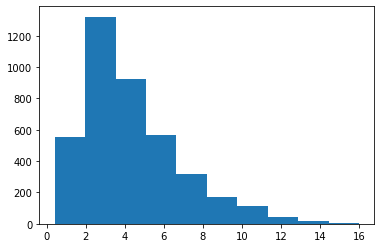

In [378]:
plt.hist(feature_set_1["TRB"])
plt.show()

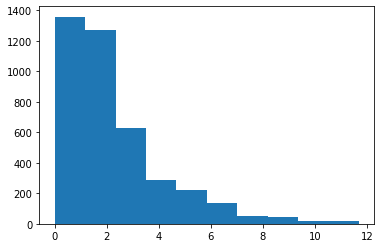

In [379]:
plt.hist(feature_set_1["AST"])
plt.show()

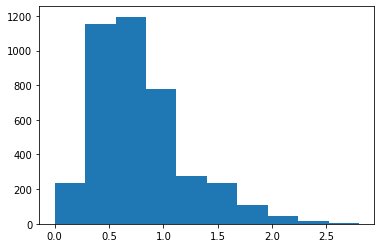

In [380]:
plt.hist(feature_set_1["STL"])
plt.show()

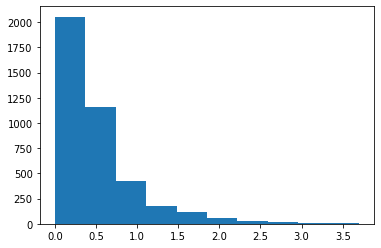

In [381]:
plt.hist(feature_set_1["BLK"])
plt.show()

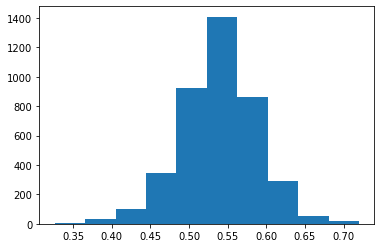

In [382]:
plt.hist(feature_set_1["TS%"])
plt.show()

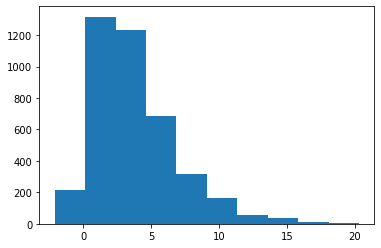

In [383]:
plt.hist(feature_set_1["WS"])
plt.show()

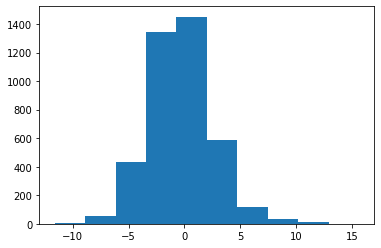

In [384]:
plt.hist(feature_set_1["BPM"])
plt.show()

In [385]:
# Set X as features data
feature_set_1 = feature_set_1.dropna()
X = feature_set_1.drop('MIP',axis=1)
X = X.drop('Player',axis=1)

In [386]:
# Set Y = target class
Y = feature_set_1.MIP

# Scalarize the features

In [387]:
sc = StandardScaler()
sc.fit(X)
sc_features = sc.transform(X)

# Get best k value approach 1: Elbow method

In [388]:
# New dataframe to store the class predictions
class_predictions = pd.DataFrame()
class_predictions['Player'] = master['Player']
class_predictions['Season'] = master['season']
class_predictions['Model Results'] = None

In [389]:
error_rate = []

In [390]:
# for i in range(1,40):
#     # Implement K-fold with 10 splits
#     #kf = KFold(n_splits=10)
#     for training, testing in kf.split(X):
#         knn = KNeighborsClassifier(n_neighbors=i)
#         print("-------------------------iter starts----------------------")
#         print("Train Index: ", training, "\n")
#         print("Test Index: ", testing)
#         min_tr = min(training)
#         max_tr = max(training)
#         min_test = min(testing)
#         max_test = max(testing)
#         X_training_data = X.iloc[min_tr:(max_tr+1)]
#         X_testing_data = X.iloc[min_test:(max_test+1)]
#         Y_training_data = Y.iloc[min_tr:(max_tr+1)]
#         Y_testing_data = Y.iloc[min_test:(max_test+1)]
#         #Fit model
#         knn.fit(X_training_data, Y_training_data)
#         knn.score(X_training_data, Y_training_data)
#         class_predict = knn.predict(X_testing_data)
#         acc_score = accuracy_score(Y_testing_data, class_predict)
#         print("Class Predict: ", class_predict)
#         print("Accuracy Score: ", acc_score)
#         pred_i = knn.predict(X_testing_data)
#         error_rate.append(np.mean(pred_i != Y_testing_data))
#         # delete later starts
#         k = 0
#         for j in testing:
#             class_predictions.iloc[j, 2] = class_predict[k]
#             k += 1
#         # delete later ends

#         print("--------------------------iteration ends----------------------")

In [391]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,391),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

In [392]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_training_data,Y_training_data)
    pred_i = knn.predict(X_testing_data)
    error_rate.append(np.mean(pred_i != Y_testing_data))

Text(0, 0.5, 'Error Rate')

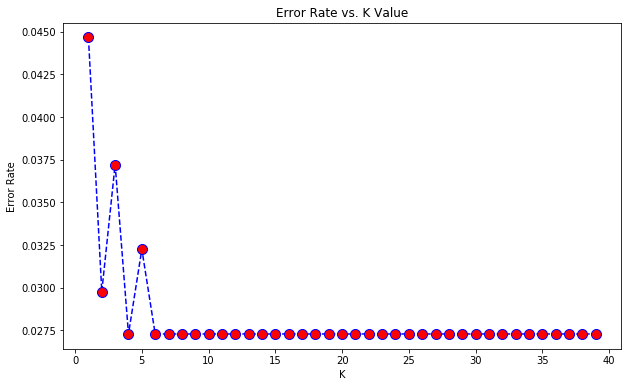

In [393]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## We can tell that the error rate is minimized when k = 5

# Get best k value approach 2: GridSearchCV

In [394]:
parameter = {'n_neighbors':np.arange(1,50)}
knn_grid_cv= GridSearchCV(knn, parameter, cv=5)
knn_grid_cv.fit(X,Y)
print("optimal accuracy: " + str(knn_grid_cv.best_score_))
print("optimal k value: " + str(knn_grid_cv.best_params_))

optimal accuracy: 0.965585540975489
optimal k value: {'n_neighbors': 10}


# Implement knn using k = 5

In [395]:
def k_fold_dt (X,Y):

    # Perform K-fold cross validation to make training and testing datasets, k = 10
    kf = KFold(n_splits=10)
    i = 1 #counter for iterations
    accuracy = []
    precision = []
    recall = []
    F1 = []
    
    for training, testing in kf.split(X):
        print("-------------------------- start k =",i,"--------------------------")
        #Define testing and training row indices (indicates which rows fall under which dataset)
        print("Train Index: ", training, "\n")
        print("Test Index: ", testing, "\n")
        knn = KNeighborsClassifier(n_neighbors=5)
        min_tr = min(training)
        max_tr = max(training)
        min_test = min(testing)
        max_test = max(testing)
        X_training_data = X.iloc[min_tr:(max_tr+1)]
        X_testing_data = X.iloc[min_test:(max_test+1)]
        Y_training_data = Y.iloc[min_tr:(max_tr+1)]
        Y_testing_data = Y.iloc[min_test:(max_test+1)]

        #Fit model
        knn.fit(X_training_data, Y_training_data)

        #Determine accuracy score
        class_predict = knn.predict(X_testing_data)
        
        accuracy.append(accuracy_score(Y_testing_data, class_predict))
        precision.append(accuracy_score(Y_testing_data, class_predict))
        recall.append(precision_score(Y_testing_data, class_predict))
        F1.append(f1_score(Y_testing_data, class_predict))
        print("Accuracy Score: ", acc_score, "\n")
        print("-------------------------- end k =",i,"--------------------------","\n")
        
        i += 1
        acc = accuracy_score(Y_testing_data, class_predict)
        pre = precision_score(Y_testing_data, class_predict)
        rec = recall_score(Y_testing_data, class_predict)
        F = f1_score(Y_testing_data, class_predict)
        
    return mean(accuracy), mean(precision), mean(recall), mean(F1)

In [398]:
k_fold_dt(X,Y)

-------------------------- start k = 1 --------------------------
Train Index:  [ 404  405  406 ... 4036 4037 4038] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 2

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.9663286489939317, 0.9663286489939317, 0.4, 0.13760291995586113)